In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, average_precision_score, PrecisionRecallDisplay

In [2]:
# 📊 Evaluation helper
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n🔍 {model_name} Evaluation:")
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("PR AUC:", average_precision_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    PrecisionRecallDisplay.from_predictions(y_test, y_prob)
    plt.title(f"Precision-Recall Curve: {model_name}")
    plt.grid(True)
    plt.show()


🔍 Logistic Regression (Credit Card) Evaluation:
F1 Score: 0.11435832274459974
ROC AUC: 0.9720834996210077
PR AUC: 0.7189705771419241
Confusion Matrix:
 [[55478  1386]
 [    8    90]]


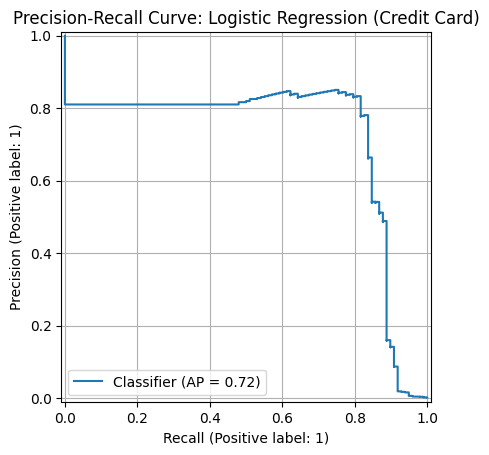


🔍 Random Forest (Credit Card) Evaluation:
F1 Score: 0.8390804597701149
ROC AUC: 0.952908497036969
PR AUC: 0.8541999432510914
Confusion Matrix:
 [[56861     3]
 [   25    73]]


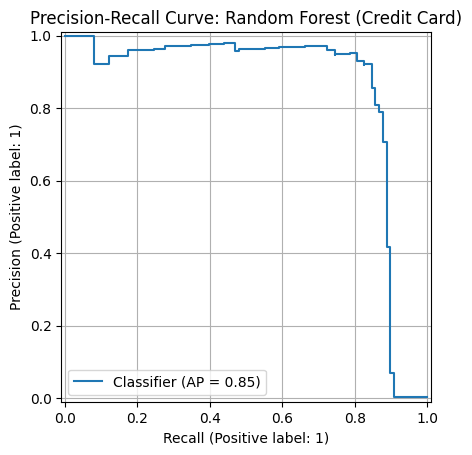

In [3]:
# 📥 Load the dataset
credit_df = pd.read_csv("creditcard.csv")

# 🧼 Prepare data
X_cc = credit_df.drop(columns=["Class"])
y_cc = credit_df["Class"]

# 🔪 Train-Test Split
X_cc_train, X_cc_test, y_cc_train, y_cc_test = train_test_split(X_cc, y_cc, stratify=y_cc, test_size=0.2, random_state=42)

# ⚖️ Scaling
scaler = StandardScaler()
X_cc_train_scaled = scaler.fit_transform(X_cc_train)
X_cc_test_scaled = scaler.transform(X_cc_test)

# 🚂 Logistic Regression
lr_model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
lr_model.fit(X_cc_train_scaled, y_cc_train)
evaluate_model(lr_model, X_cc_test_scaled, y_cc_test, "Logistic Regression (Credit Card)")

# 🌲 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_cc_train, y_cc_train)
evaluate_model(rf_model, X_cc_test, y_cc_test, "Random Forest (Credit Card)")



🔍 Logistic Regression (E-Commerce) Evaluation:
F1 Score: 0.6484279297672519
ROC AUC: 0.7474990193130508
PR AUC: 0.5714318491944708
Confusion Matrix:
 [[26913   480]
 [ 1242  1588]]


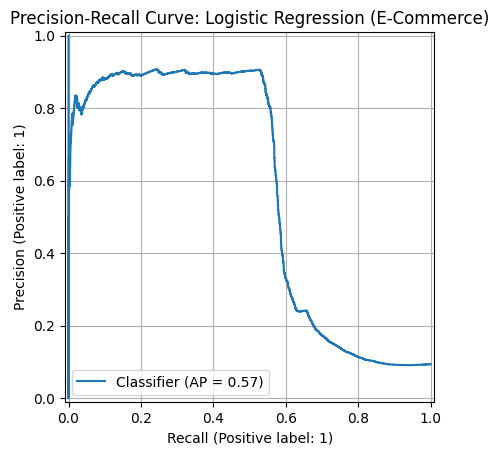

[LightGBM] [Info] Number of positive: 11321, number of negative: 109568
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 120889, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



🔍 LightGBM (E-Commerce) Evaluation:
F1 Score: 0.24728368625584898
ROC AUC: 0.6679670620760327
PR AUC: 0.22076958113322367
Confusion Matrix:
 [[19173  8220]
 [ 1271  1559]]


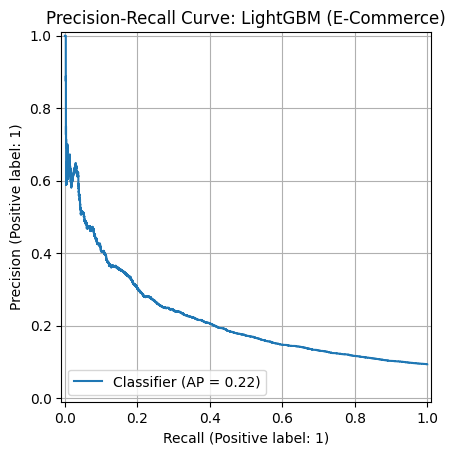

In [9]:
# 📥 Load the fraud dataset
fraud_df = pd.read_csv("Fraud_Data.csv")

# 🎯 Target and features
drop_cols = ["class", "purchase_time", "signup_time", "ip_address", "ip_int", "country"]
X_fraud = fraud_df.drop(columns=[col for col in drop_cols if col in fraud_df.columns])
y_fraud = fraud_df["class"]

# 🔪 Train-test split
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(
    X_fraud, y_fraud, stratify=y_fraud, test_size=0.2, random_state=42
)

# ✅ Automatically detect column types
categorical_cols = X_fraud.select_dtypes(include="object").columns.tolist()
numerical_cols = X_fraud.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 🧼 Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# 🔧 Apply preprocessing
X_fraud_train_proc = preprocessor.fit_transform(X_fraud_train)
X_fraud_test_proc = preprocessor.transform(X_fraud_test)

# 🚂 Logistic Regression
lr_fraud = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
lr_fraud.fit(X_fraud_train_proc, y_fraud_train)
evaluate_model(lr_fraud, X_fraud_test_proc, y_fraud_test, "Logistic Regression (E-Commerce)")

# ⚡ LightGBM
lgbm = LGBMClassifier(class_weight="balanced", random_state=42)
lgbm.fit(X_fraud_train_proc, y_fraud_train)
evaluate_model(lgbm, X_fraud_test_proc, y_fraud_test, "LightGBM (E-Commerce)")
